<a href="https://colab.research.google.com/github/Arluxs/countersgo/blob/main/Modelo_final_ML_ET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

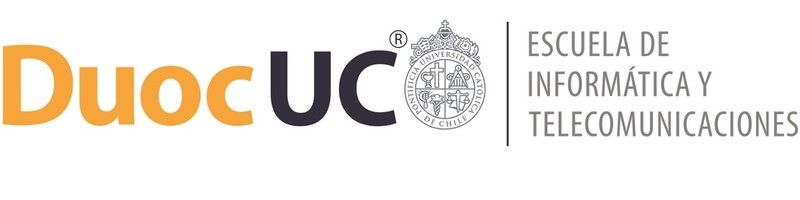

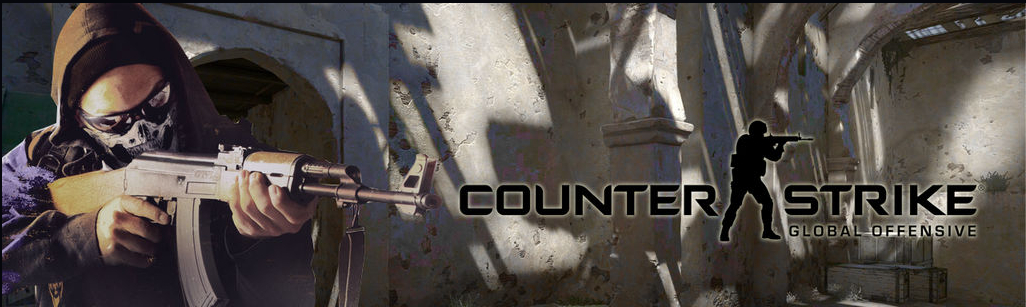

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
*
*

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

"""
El proyecto se centra en analizar las estadísticas de juegos de un juego en línea popular.
El objetivo principal es entender los factores que contribuyen al éxito de un jugador individual y de un equipo en cada partida.
Esto puede incluir aspectos como la eficacia en el uso de armas, la supervivencia en cada ronda, y otros eventos clave durante el juego.

El análisis de estas estadísticas puede proporcionar información valiosa para los desarrolladores del juego,
equipos profesionales de eSports y jugadores individuales que desean mejorar su rendimiento.

-idjugador`: ID único para cada jugador.
-Map`: El mapa en el que se jugó la partida.
-Team`: El equipo al que pertenece el jugador.
-MatchId`: ID único para cada partido.
-RoundId`: ID único para cada ronda dentro de un partido.
-RoundWinner`: El equipo ganador de la ronda.
-MatchWinner`: El equipo ganador del partido.
-Survived`: Indicador de si el jugador sobrevivió o no en la ronda.
-RLethalGrenadesThrown`: Número de granadas letales lanzadas por el jugador.
-RNonLethalGrenadesThrown`: Número de granadas no letales lanzadas por el jugador.


Estas son algunas de las variables clave que se utilizarán en el análisis.
Cada una de ellas puede proporcionar información relevante sobre el rendimiento del jugador y el resultado de la partida.


- Hipótesis: Predecir si un jugador sobrevive a la ronda, o no.

"""

'\nEl proyecto se centra en analizar las estadísticas de juegos de un juego en línea popular.\nEl objetivo principal es entender los factores que contribuyen al éxito de un jugador individual y de un equipo en cada partida.\nEsto puede incluir aspectos como la eficacia en el uso de armas, la supervivencia en cada ronda, y otros eventos clave durante el juego.\n\nEl análisis de estas estadísticas puede proporcionar información valiosa para los desarrolladores del juego,\nequipos profesionales de eSports y jugadores individuales que desean mejorar su rendimiento.\n\n-idjugador`: ID único para cada jugador.\n-Map`: El mapa en el que se jugó la partida.\n-Team`: El equipo al que pertenece el jugador.\n-MatchId`: ID único para cada partido.\n-RoundId`: ID único para cada ronda dentro de un partido.\n-RoundWinner`: El equipo ganador de la ronda.\n-MatchWinner`: El equipo ganador del partido.\n-Survived`: Indicador de si el jugador sobrevivió o no en la ronda.\n-RLethalGrenadesThrown`: Número

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pickle

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/Arluxs/countersgo/main/Anexo%20ET_demo_round_traces.csv"


# Leer el archivo CSV desde la URL
df = pd.read_csv(url, sep=";")

print(df.head())

   Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

  RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0       False        True     False          False  ...          0   
1       False        True     False          False  ...          0   
2       False        True     False          False  ...          0   
3       False        True     False          False  ...          0   
4       False        True      True          False  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0               0                0       

<ipython-input-38-4ba8a7788804>:28: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=";")


In [ ]:
#Tratamiento de datos

df.shape

(79157, 30)

En este caso podemos saber que:
-**79157 filas**: Podemos decir que tenemos 79157 registros de datos con información.
-**30 columnas**: Podemos decir que tenemos 30 datos para cada registro.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

Con 'Columns' podemos ver las columnas especificas de los datos qué nos entregó el 'Shape'. Entonces tenemos 30 columnas desde 'Unnamed: 0' a 'MatchHeadshots'

In [ ]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


Con 'head' podemos analizar los primeros 5 registros de datos, esto nos ayudará a visualizar un poco los datos, y la magnitud de nuestro DataFrame.
Ejemplo: 'Puedo inferir qué el map 'de_inferno' es solicitado por el principio del Frame


In [ ]:
df.isna().sum()


Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

Con el termino 'df.isna().sum()' podemos ver especificamente cuales son las columnas qué estan vacias o nulas, osea tenemos 3 casillas vacias

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


Con 'df.describe().T', tenemos una transportación de los datos 'T' y con 'describe()' obtenemos un resumen estadístico de las columnas y en este caso son estos datos:
**-count: Número de valores no nulos.**
**-mean: Media de los valores.**
**-std: Desviación estándar.**
**-min: Valor mínimo.**
-**25%: Primer cuartil (percentil 25).**
**-50%: Mediana (percentil 50).**
**-75%: Tercer cuartil (percentil 75).**
**-max: Valor máximo. **

# **Estadisticas en graficos**

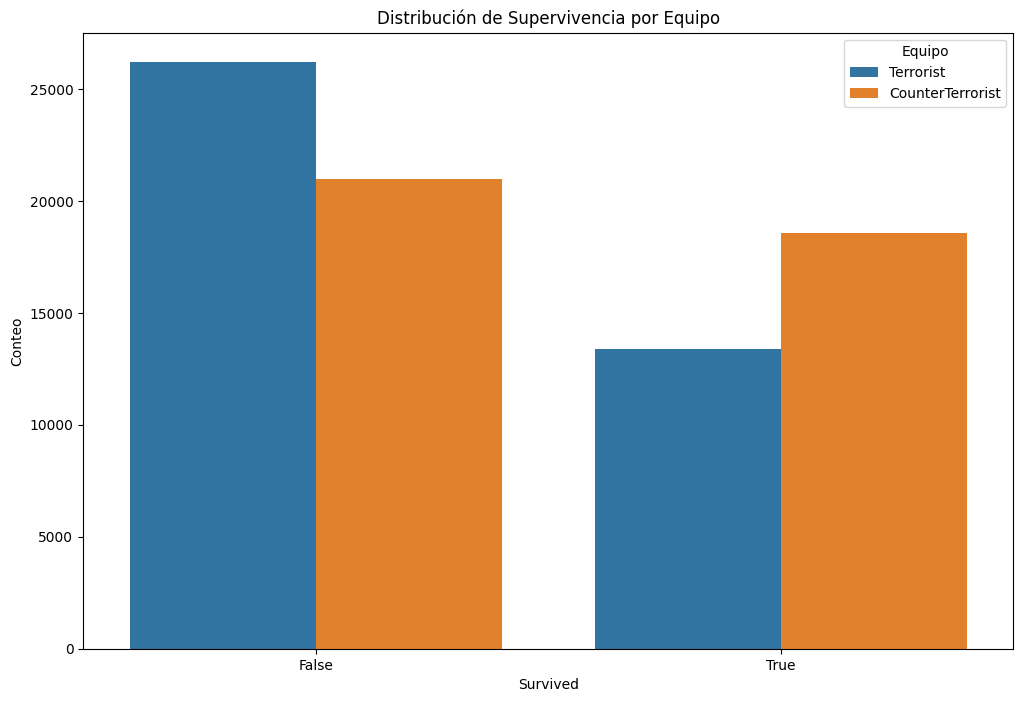

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Survived', hue='Team')
plt.title('Distribución de Supervivencia por Equipo')
plt.ylabel('Conteo')
plt.legend(title='Equipo')
plt.show()

Con este grafico queremos ver quienes sobreviven a nivel de team, analizandolo podemos decir que **Counter Terrorist** son mas propensos a sobrevivir con aproximadamente 1500 a 2000 registros como **sobreviviente**

<ipython-input-8-4390c0b06dce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='RoundKills', data=kills_by_team, palette='viridis')


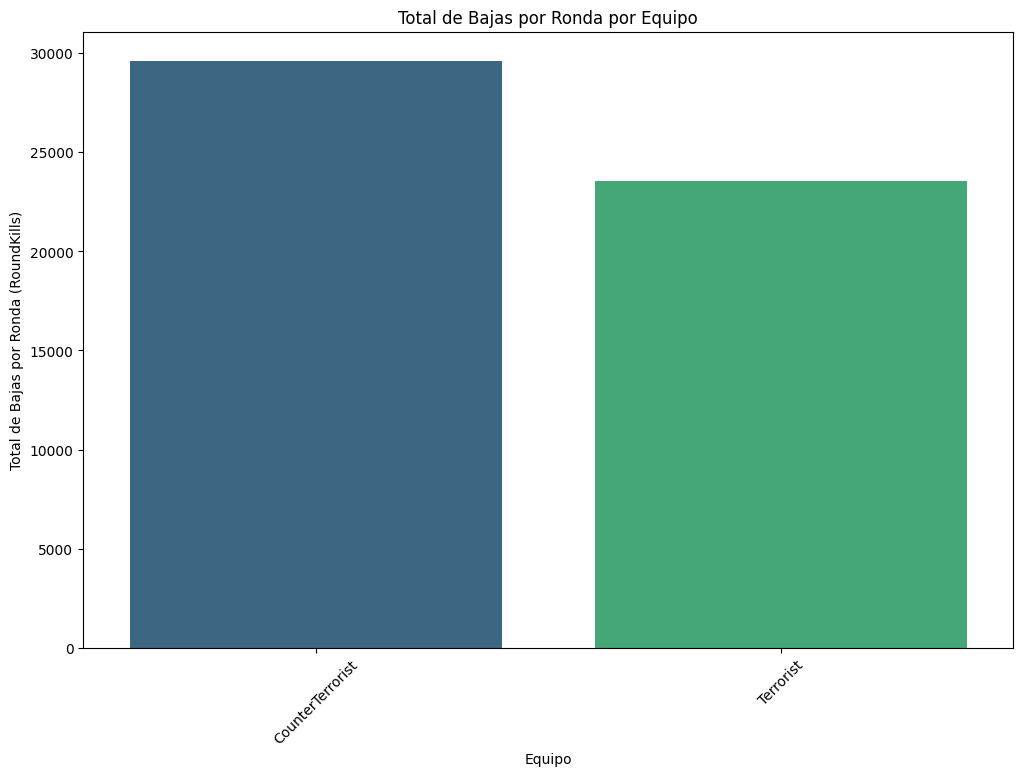

In [ ]:
# Agrupar y sumar las bajas por equipo
kills_by_team = df.groupby('Team')['RoundKills'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='RoundKills', data=kills_by_team, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Equipo')
plt.ylabel('Total de Bajas por Ronda (RoundKills)')
plt.title('Total de Bajas por Ronda por Equipo')

# Rotar las etiquetas del eje X si es necesario
plt.xticks(rotation=45)
plt.show()



Con este grafico tomamos las kills por las rondas totales, y ademas lo segmentamos por equipo, eso no dio como resultado que equipo es mas propenso a realizar mas kills.
**Resultado: CounterTerrorist con un aproximado entre 2500 a 3000 kills.**


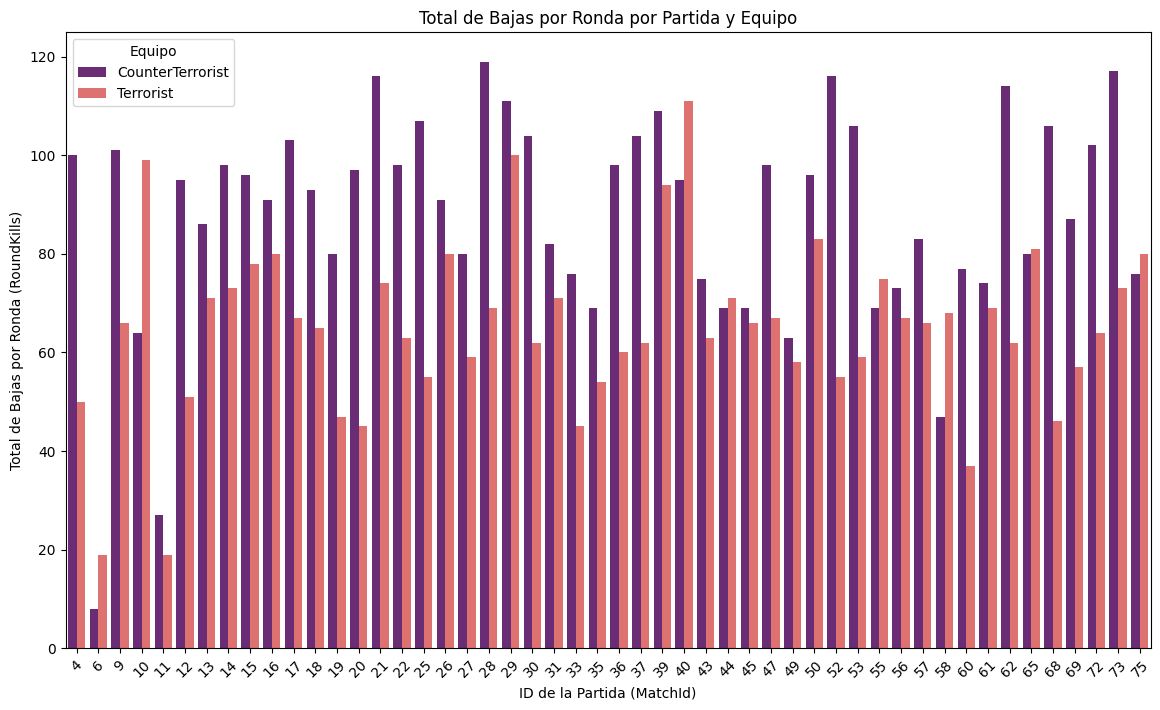

In [ ]:
# Agrupar y sumar las bajas por MatchId y Team
kills_by_match_team = df.groupby(['MatchId', 'Team'])['RoundKills'].sum().reset_index()

# Filtrar las 10 primeras partidas (MatchId)
top_matches = kills_by_match_team['MatchId'].unique()[:50]
kills_by_match_team = kills_by_match_team[kills_by_match_team['MatchId'].isin(top_matches)]

# Crear el gráfico de barras apiladas para mostrar el total de bajas por partida y equipo
plt.figure(figsize=(14, 8))
sns.barplot(x='MatchId', y='RoundKills', hue='Team', data=kills_by_match_team, palette='magma')

# Añadir etiquetas y título
plt.xlabel('ID de la Partida (MatchId)')
plt.ylabel('Total de Bajas por Ronda (RoundKills)')
plt.title('Total de Bajas por Ronda por Partida y Equipo')
plt.xticks(rotation=45)
plt.legend(title='Equipo')

# Mostrar el gráfico
plt.show()


Acá tomamos los equipos, y sumamos su kills por ronda, pero sumandole el MatchId para poder tener un aproximado de cuando cada equipo tubo mejor rendimiento.
Como resultado **Podemos decir que durante las partidas de MatchId siempre se vieron beneficiadas en KILLS por Counterterrorist**

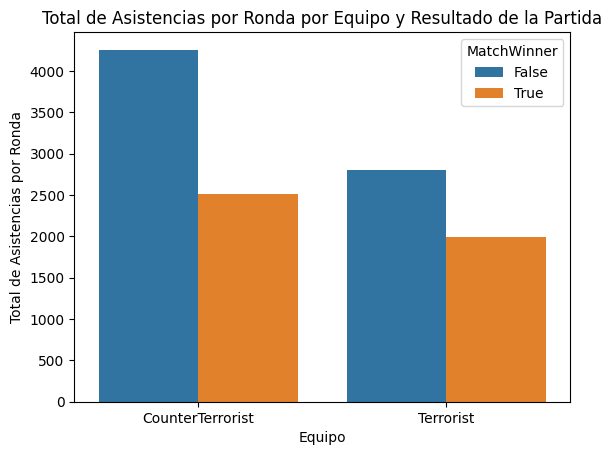

In [ ]:

# Crear un DataFrame auxiliar para calcular la cantidad total de asistencias por ronda por equipo y resultado de la partida
assists_by_team = df.groupby(['Team', 'MatchWinner'])['RoundAssists'].sum().reset_index()

# Crear el gráfico de barras
sns.barplot(x='Team', y='RoundAssists', hue='MatchWinner', data=assists_by_team)

# Añadir etiquetas y título
plt.xlabel('Equipo')
plt.ylabel('Total de Asistencias por Ronda')
plt.title('Total de Asistencias por Ronda por Equipo y Resultado de la Partida')

# Mostrar el gráfico
plt.show()


Este grafico nos ayuda a calcular las asistencias por ronda basado en cada equipo.
Resultado **El team CounterTerrorist es propenso a realizar mas asistencias en cada ronda, con ejemplo de 2500 asistencias, en comparación con terrorist con casi 2000 asistencias por ronda**

In [ ]:
df.describe().T

# Contar los valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores Faltantes por Columna:\n", missing_values)




Valores Faltantes por Columna:
 Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadsh

Con esto llegamos a la conclusion de que tenemos 3 datos faltantes por columna, los cuales necesitamos depurar.

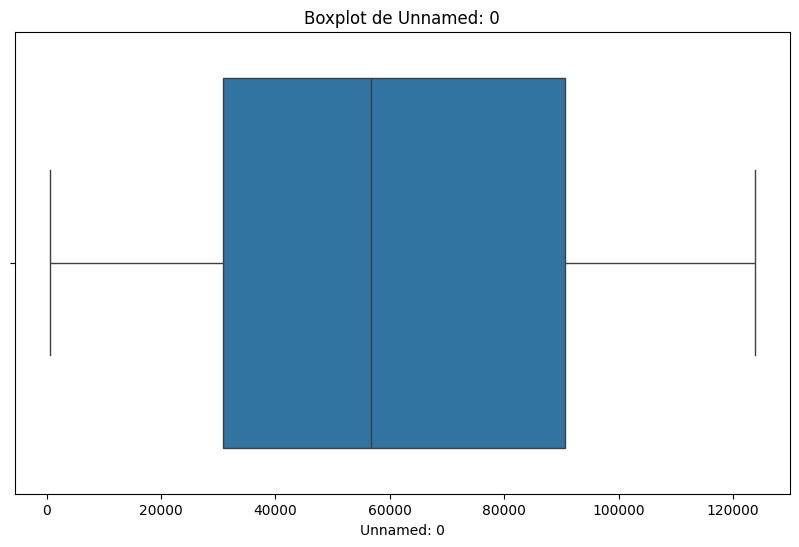

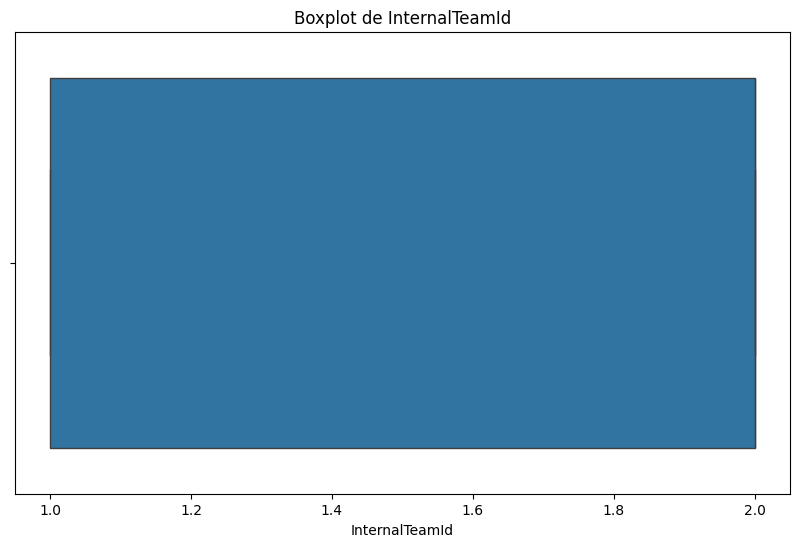

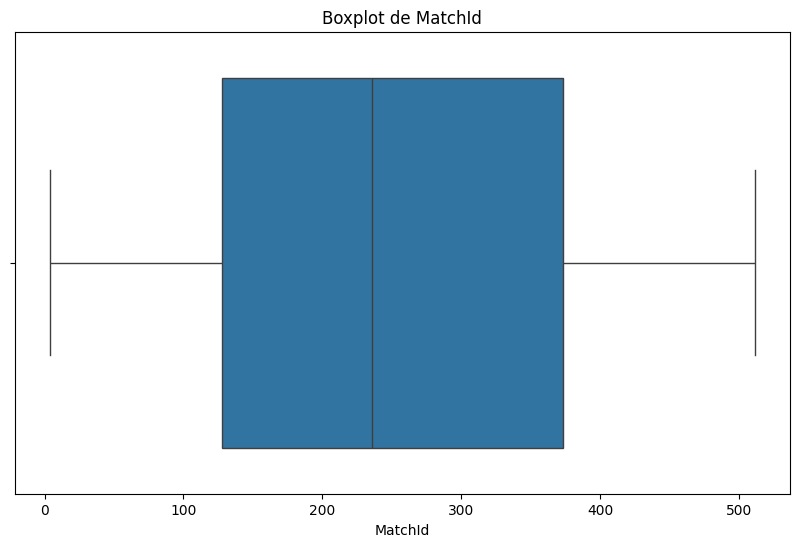

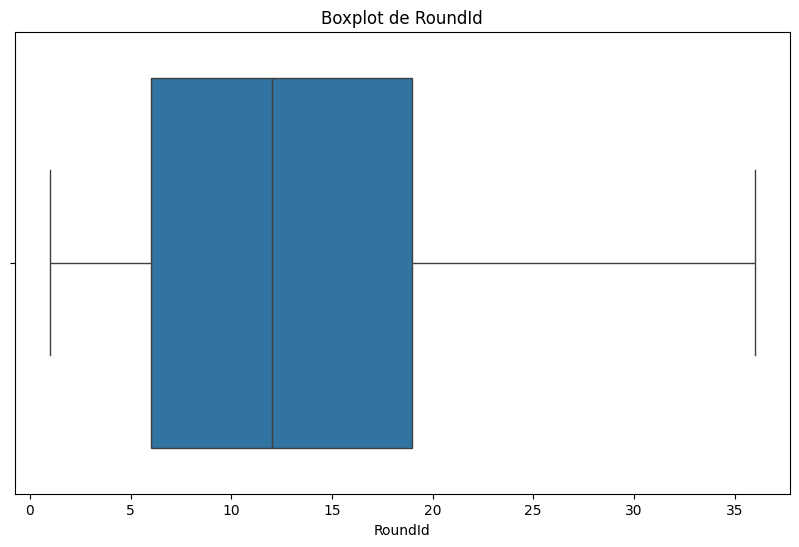

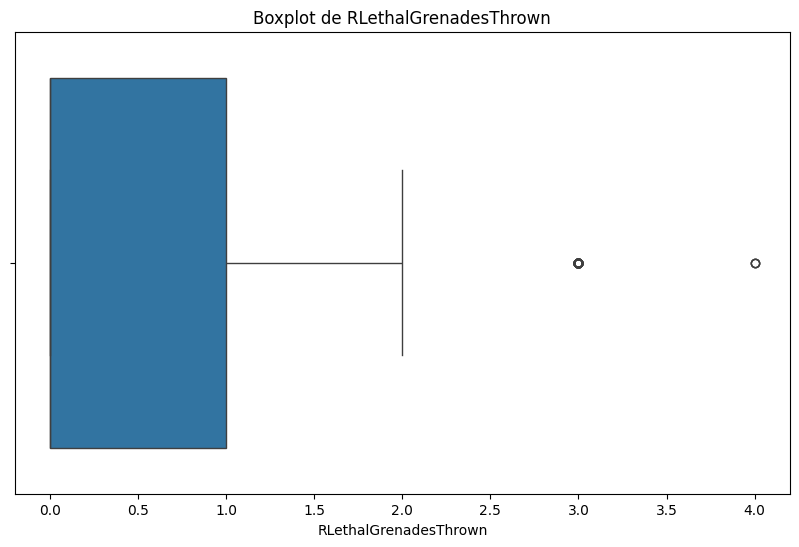

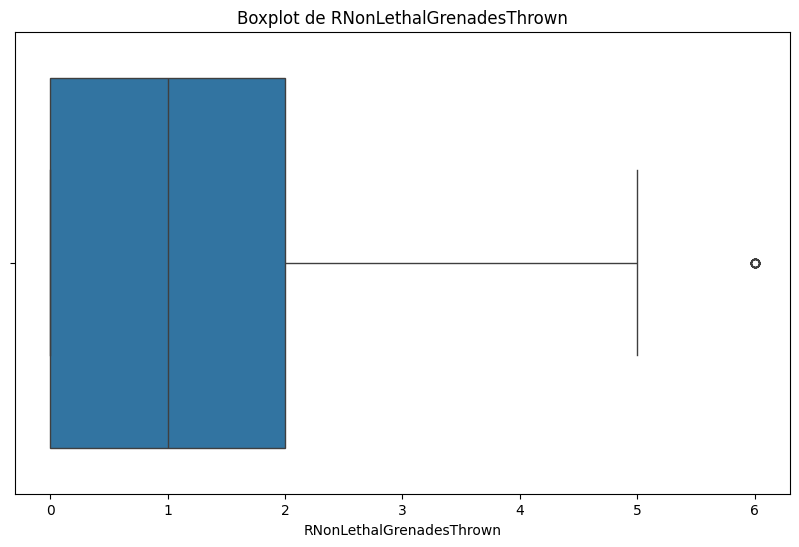

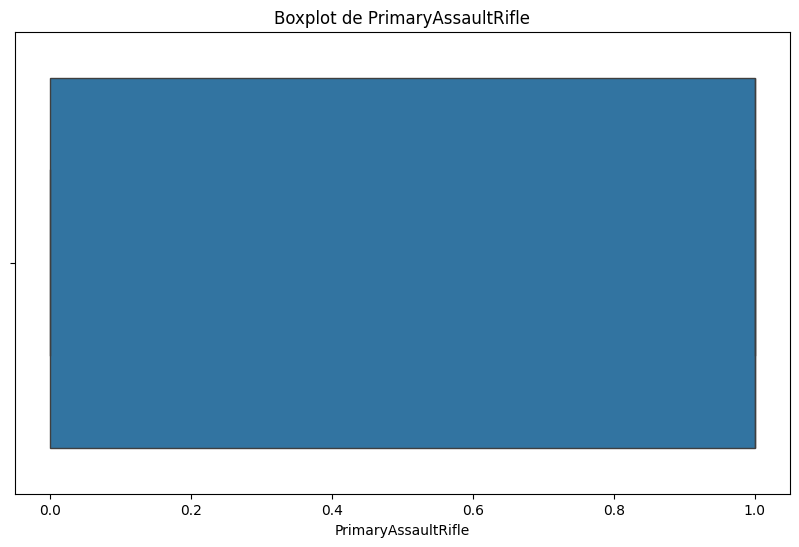

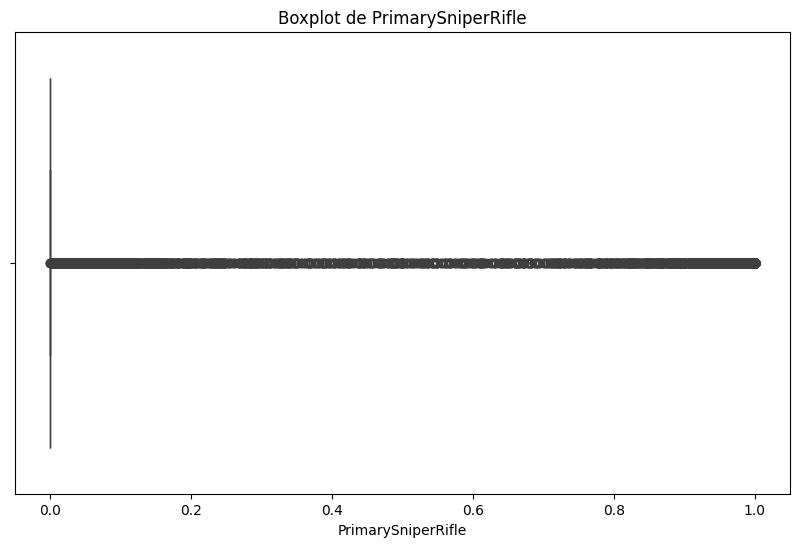

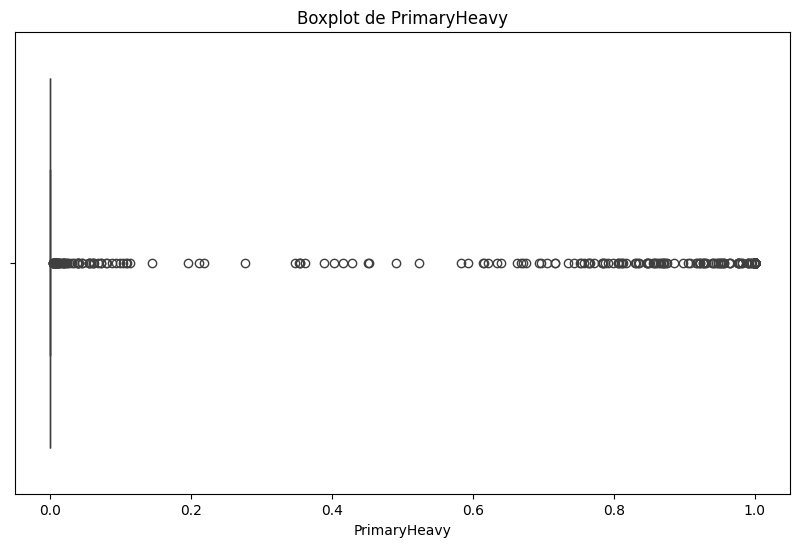

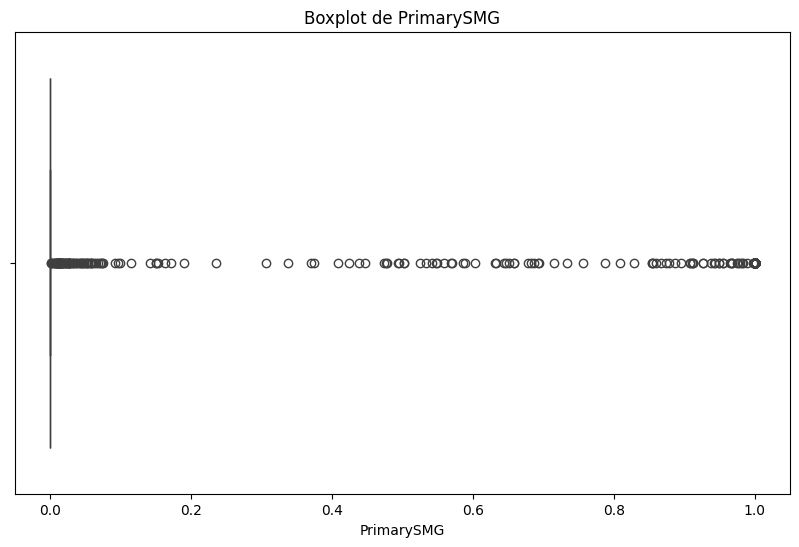

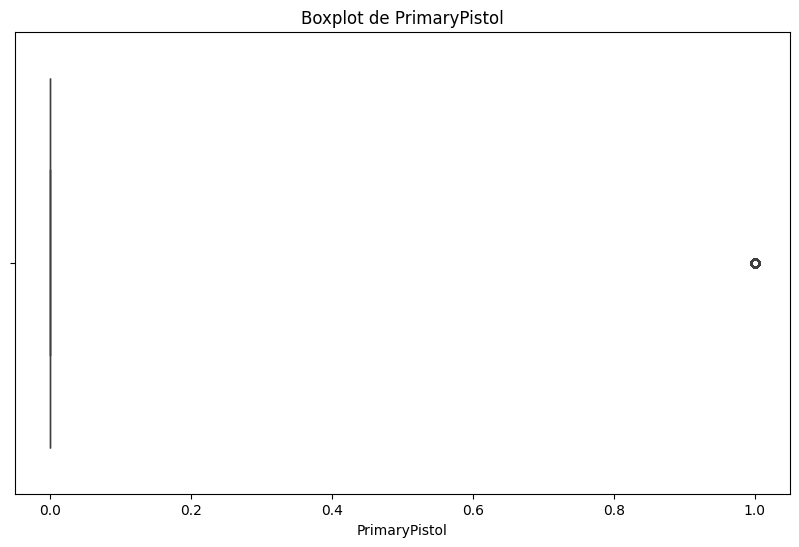

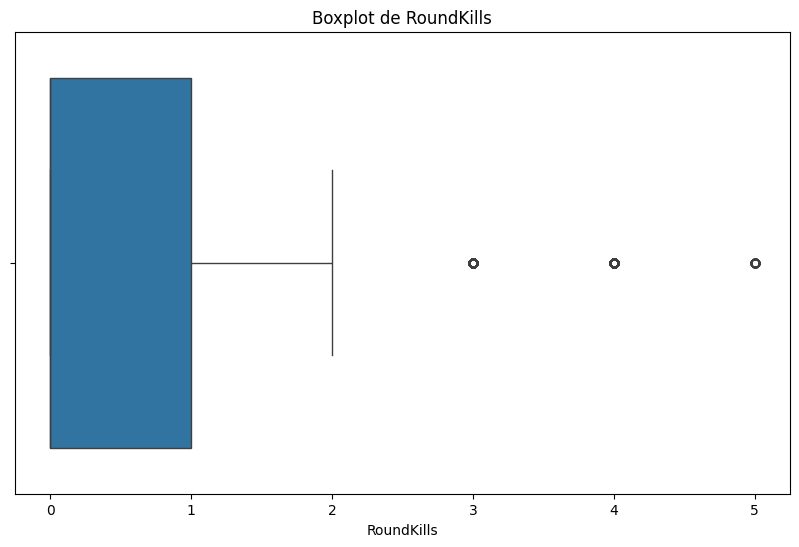

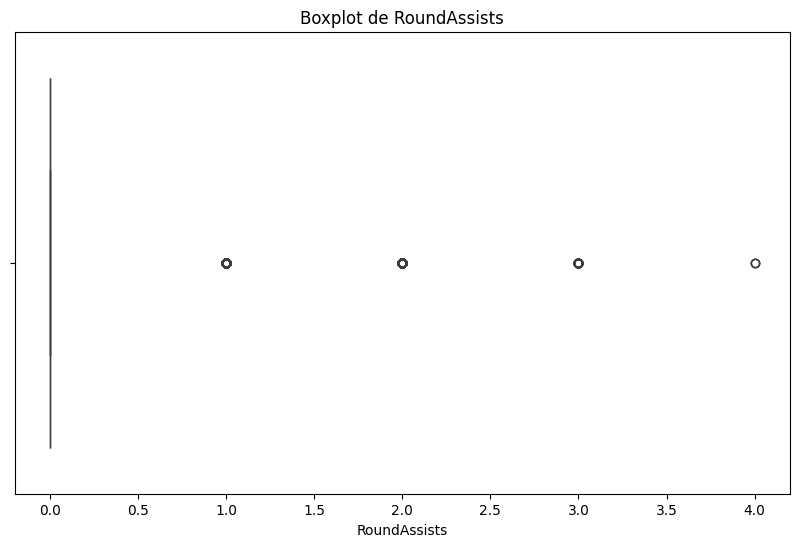

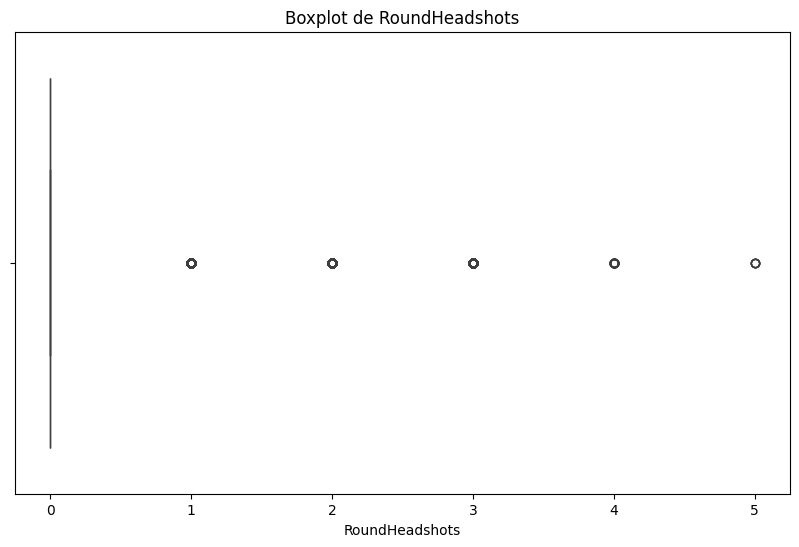

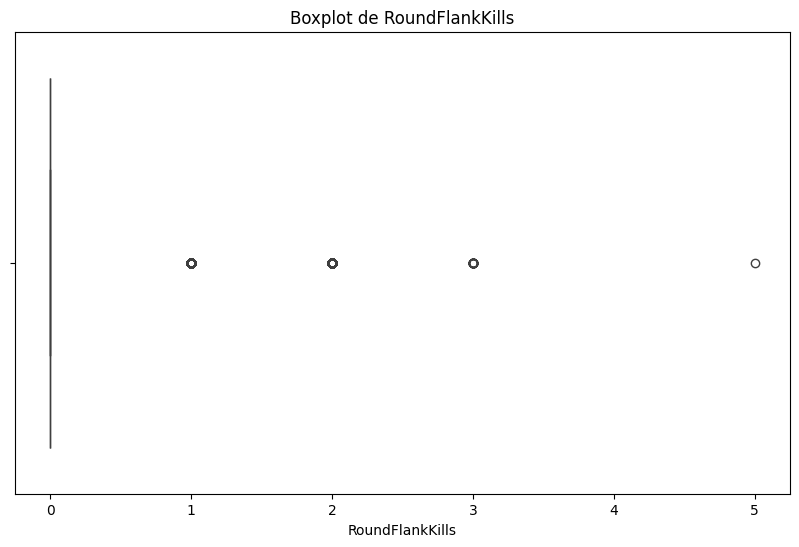

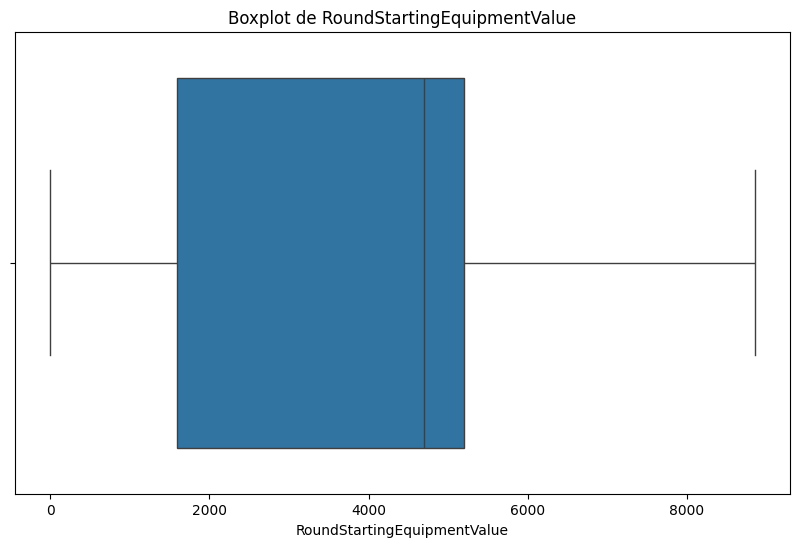

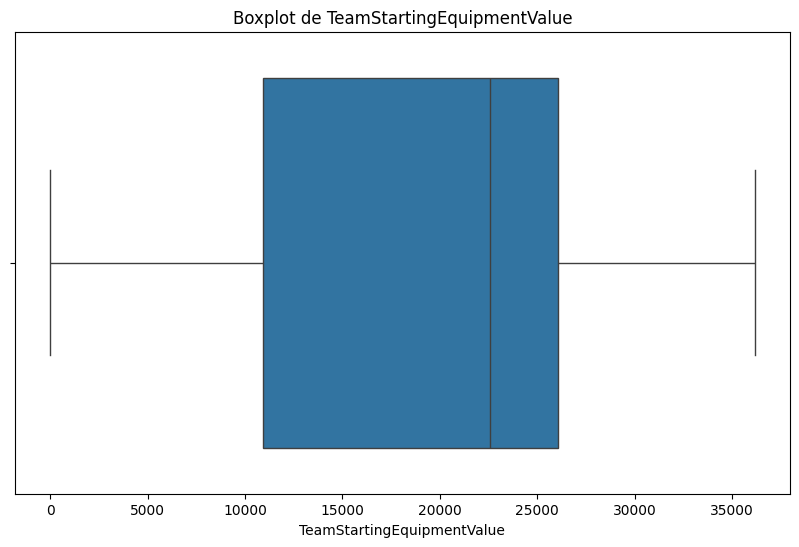

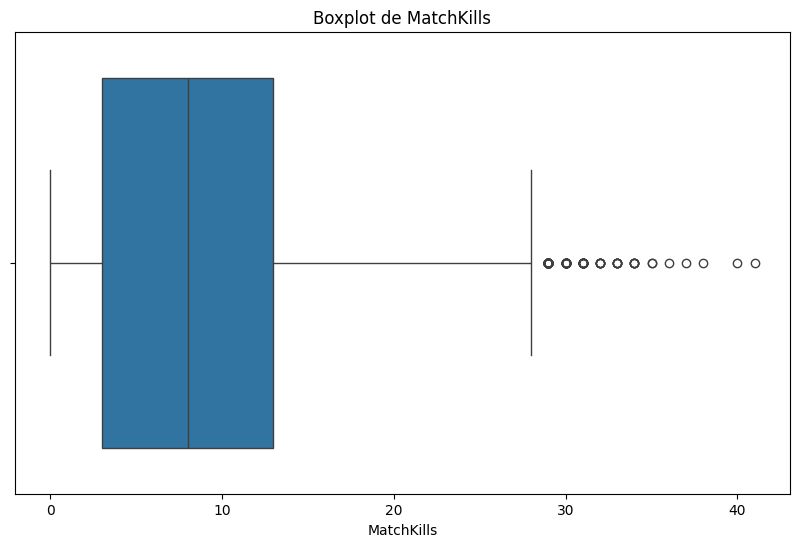

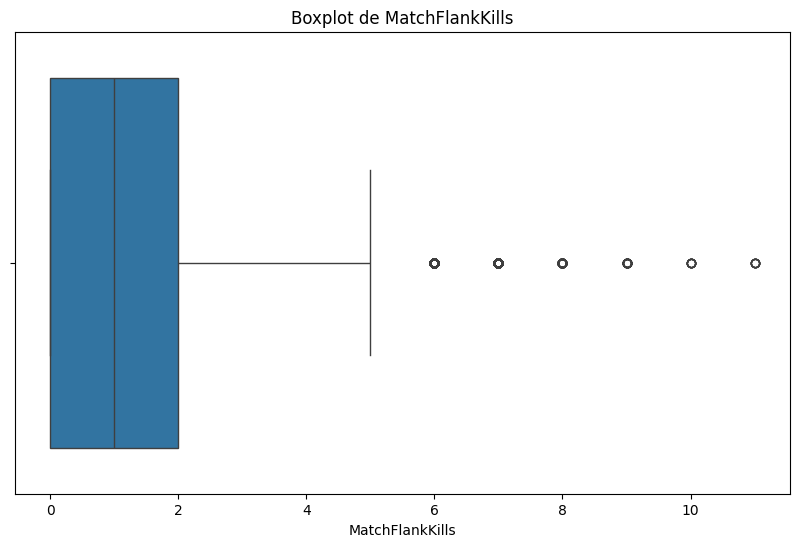

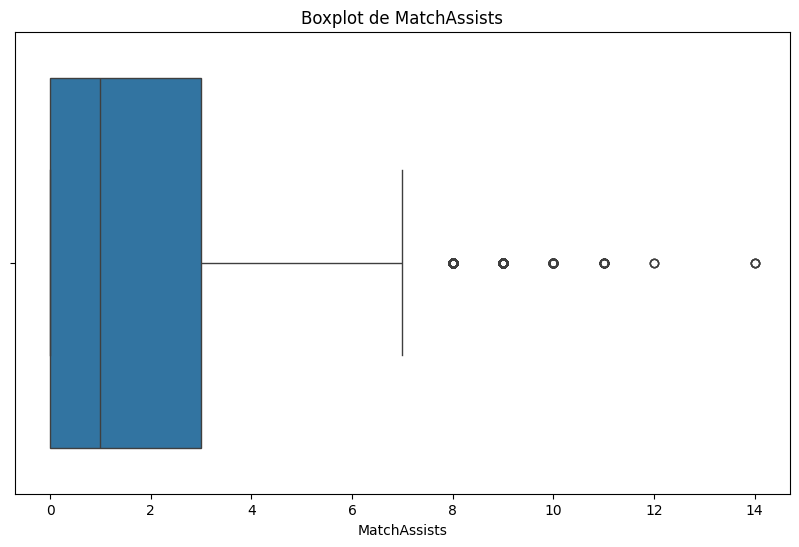

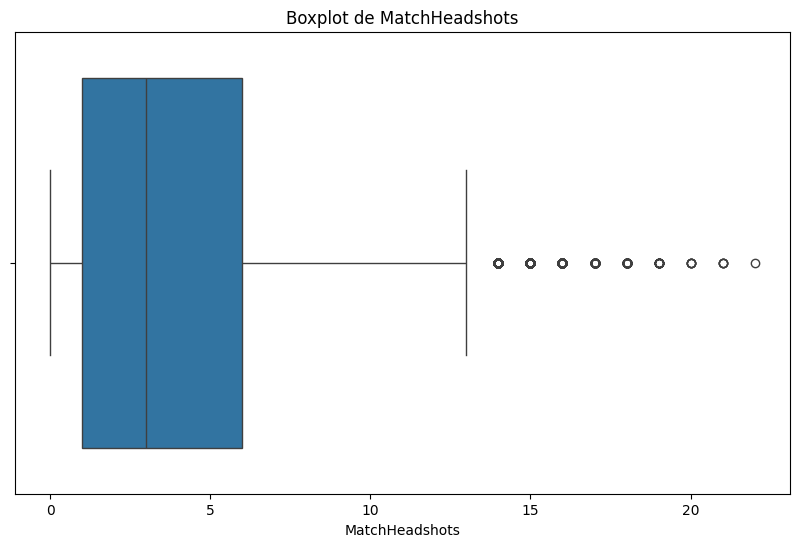

In [ ]:
for column in df.select_dtypes(include=[float, int]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

Con este codigo obtendremos las variables que tienen diferentes Outliers.
En este campo dejaremos los Outliers


1.   Rlethalgrenadesthrown **2**
2.   Rnonlethalgrenadesthrown **1**
3.   Promarysniperrifke **todo**
4.   Primaryheavy **todos**
5.   PrimarySMG **1**
6.   Roundkills **3**
7.   RoundAssits**4**
8.   RoundHeadshots **5**
9.   RoundFlankkills **4**
10.   Matchkills **12**
11.   MatchFlankills **6**
12.   MatchAssists **6**
13.   Matchheadshots **9**

Eso quiere decir qué de esas variables tenemos ciertos datos que se alejan mucho del resto de datos.









## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

# Copiar el DataFrame completo
df2 = df.copy()

df_clean = df2.dropna()



Con esta fracción creamos un segundo DataFrame tomando el anterior como ejemplo.
Ahora creamos un Dataframe limpio con 'DROPNA' eliminando los valores vacios.

In [ ]:
empty_columns = df.columns[df.isna().any()].tolist()
print("Columnas con valores faltantes:", empty_columns)
missing_counts = df.isna().sum()
print("Conteo de valores faltantes por columna:\n", missing_counts)
threshold = 0.5  # Umbral del 50%
columns_above_threshold = df.columns[df.isna().mean() > threshold].tolist()
print("Columnas con más del 50% de valores faltantes:", columns_above_threshold)


Columnas con valores faltantes: ['Team', 'MatchWinner']
Conteo de valores faltantes por columna:
 Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankK

In [ ]:


# Identificar las columnas con valores faltantes
empty_columns = df.columns[df.isna().any()].tolist()
print("Columnas con valores faltantes:", empty_columns)

# Mostrar el conteo de valores faltantes por columna
missing_counts = df.isna().sum()
print("\nConteo de valores faltantes por columna:\n", missing_counts)

# Umbral del 50% para valores faltantes
threshold = 0.5
columns_above_threshold = df.columns[df.isna().mean() > threshold].tolist()
print("\nColumnas con más del 50% de valores faltantes:", columns_above_threshold)

# Función para mostrar 5 filas alrededor del valor faltante
def show_missing_context(df, column):
    missing_indices = df[df[column].isna()].index
    for idx in missing_indices:
        start_idx = max(idx - 2, 0)
        end_idx = min(idx + 3, len(df))
        print(f"\nValores alrededor del dato faltante en la columna '{column}', fila {idx}:")
        print(df.loc[start_idx:end_idx])

# Mostrar 5 filas alrededor de cada valor faltante en cada columna con valores faltantes
for col in empty_columns:
    show_missing_context(df, col)

Columnas con valores faltantes: ['Team', 'MatchWinner']

Conteo de valores faltantes por columna:
 Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlank

Con este codigo pude ver los datos que me faltaban y por logica puedo decir que en 'TEAM' el dato que falta es **Terrorist**, debido a que tenemos equipos de 5 y justo esa linea tiene solo 4.
Y el segundo **CounterTerrorist**
Y con MatchWinner **Falso** ya que todo su equipo perdió aquella ronda.

In [ ]:
# Rellenar los valores faltantes en la columna 'Team'
team_na_indices = df[df['Team'].isna()].index
print(f"Indices con valores faltantes en 'Team': {team_na_indices}")

# Rellenar el primer valor faltante en 'Team' con 'Terrorist'
df.loc[team_na_indices[0], 'Team'] = 'Terrorist'

# Rellenar el segundo valor faltante en 'Team' con 'CounterTerrorist'
# Si hay más de uno, puedes usar un bucle o lógica específica adicional para encontrar el índice correcto.
if len(team_na_indices) > 1:
    df.loc[team_na_indices[1], 'Team'] = 'CounterTerrorist'

# Rellenar los valores faltantes en la columna 'MatchWinner' con 'Falso'
matchwinner_na_indices = df[df['MatchWinner'].isna()].index
print(f"Indices con valores faltantes en 'MatchWinner': {matchwinner_na_indices}")

# Rellenar los valores faltantes en 'MatchWinner' con 'Falso'
df.loc[matchwinner_na_indices, 'MatchWinner'] = 'Falso'

# Mostrar el DataFrame después de la imputación
print("\nDataFrame después de la imputación:")
print(df)

df.describe().T

# Contar los valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores Faltantes por Columna:\n", missing_values)


Indices con valores faltantes en 'Team': Index([13, 27], dtype='int64')
Indices con valores faltantes en 'MatchWinner': Index([29], dtype='int64')

DataFrame después de la imputación:
       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist         

Con este codigo rellenamos logicamente los datos faltantes.
Rellenando los dos Team y MatchWinner

In [ ]:
# Identificar columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Mostrar las columnas no numéricas
print("Columnas no numéricas:")
print(non_numeric_columns)

Columnas no numéricas:
['Map', 'Team', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']


In [ ]:
# Seleccionar columnas categóricas relevantes para la transformación
categorical_columns = [
    'Map', 'Team', 'InternalTeamId', 'RoundWinner', 'MatchWinner',
    'Survived', 'AbnormalMatch', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
    'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol','TimeAlive', 'TravelledDistance', 'FirstKillTime' ]

# Aplicar Label Encoding a las columnas categóricas seleccionadas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Revisar el DataFrame transformado
print("DataFrame después de Label Encoding:")
print(df.head())

DataFrame después de Label Encoding:
   Unnamed: 0  Map  Team  InternalTeamId  MatchId  RoundId  RoundWinner  \
0         600    1     1               0        4        1            0   
1         601    1     1               0        4        1            0   
2         602    1     1               0        4        1            0   
3         603    1     1               0        4        1            0   
4         604    1     1               0        4        1            0   

   MatchWinner  Survived  AbnormalMatch  ...  RoundKills  RoundAssists  \
0            2         0              0  ...           0             0   
1            2         0              0  ...           0             0   
2            2         0              0  ...           0             0   
3            2         0              0  ...           0             0   
4            2         1              0  ...           0             0   

   RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \


Ahora tenemos todas las variables numericas

In [ ]:
# Suponiendo que tienes df como tu DataFrame original

# Seleccionar las columnas numéricas para escalar
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns



# Inicializar RobustScaler
scaler = RobustScaler()

# Escalar solo las columnas numéricas del DataFrame original
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Calcular el rango intercuartílico (IQR)
Q1 = np.percentile(df_scaled[numerical_columns], 25, axis=0)
Q3 = np.percentile(df_scaled[numerical_columns], 75, axis=0)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar índices de outliers
outlier_mask = (df_scaled[numerical_columns] < lower_bound) | (df_scaled[numerical_columns] > upper_bound)
outlier_indices = np.where(outlier_mask.any(axis=1))[0]

# Eliminar outliers del conjunto de datos
df_cleaned = df.drop(index=outlier_indices)

# Verificar las dimensiones después de eliminar outliers
print(f"Dimensiones de df después de eliminar outliers: {df_cleaned.shape}")

# Paso 1: Convertir variables booleanas a enteros
df_cleaned['Survived'] = df_cleaned['Survived'].astype(int)
df_cleaned['AbnormalMatch'] = df_cleaned['AbnormalMatch'].astype(int)

# Paso 2: Identificar las columnas categóricas
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Opción 2: Frecuencia de codificación para variables categóricas
for col in categorical_columns:
   freq_encoding = df_cleaned[col].value_counts(normalize=True).to_dict()
   df_cleaned[col] = df_cleaned[col].map(freq_encoding)


# Paso 4: Manejar valores nulos (rellenando con la media de cada columna numérica)
df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

# Mostrar las primeras filas del DataFrame convertido
print("DataFrame convertido a numérico:")
print(df_cleaned.head())

# Paso 5: Identificar las columnas numéricas
numerical_columns = df_cleaned.columns  # Ahora todas las columnas deberían ser numéricas

# Paso 6: Escoger el escalador y aplicar el escalado
scaler = StandardScaler()  # Para estandarización (media=0, desviación estándar=1)
df_scaled_final = df_cleaned.copy()
df_scaled_final[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Mostrar los resultados
print("\nDataFrame escalado:")
print(df_scaled_final.head())

Dimensiones de df después de eliminar outliers: (27632, 30)
DataFrame convertido a numérico:
    Unnamed: 0  Map  Team  InternalTeamId  MatchId  RoundId  RoundWinner  \
18         618    1     0               1        4        2            0   
28         628    1     0               1        4        3            0   
29         629    1     0               1        4        3            1   
30         630    1     1               0        4        4            2   
31         631    1     1               0        4        4            2   

    MatchWinner  Survived  AbnormalMatch  ...  RoundKills  RoundAssists  \
18            0         1              0  ...           1             0   
28            0         1              0  ...           0             0   
29            1         1              0  ...           0             0   
30            2         0              0  ...           0             0   
31            2         0              0  ...           0             0   


Con este codigo logramos convertir las variables a una escala, a demas de eliminar outliners

In [ ]:
# prompt: Eso quiere decir que ya escalamos y convertimos en variable scategoricas?

# Check the data types of the columns after scaling
df_scaled_final.dtypes




Unnamed: 0                     float64
Map                            float64
Team                           float64
InternalTeamId                 float64
MatchId                        float64
RoundId                        float64
RoundWinner                    float64
MatchWinner                    float64
Survived                       float64
AbnormalMatch                  float64
TimeAlive                      float64
TravelledDistance              float64
RLethalGrenadesThrown          float64
RNonLethalGrenadesThrown       float64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                  float64
FirstKillTime                  float64
RoundKills                     float64
RoundAssists                   float64
RoundHeadshots                 float64
RoundFlankKills                float64
RoundStartingEquipmentValue    float64
TeamStartingEquipmentValu

Aqui ya tenemos las variables y sus tipos, transformadas en variables categoricas

### Regresión

In [ ]:
df_scaled_final = df_scaled_final.dropna()
# Identificar columnas con NaN
print(df_scaled_final.isna().sum())
# Eliminar columnas con todos los valores NaN
df_scaled_final = df_scaled_final.dropna(axis=1, how='all')
# Rellenar NaN con la media de la columna
df_scaled_final = df_scaled_final.fillna(df_scaled_final.mean())
# Identificar columnas con varianza cero
varianza_cero = df_scaled_final.columns[df_scaled_final.var() == 0]
print(f"Columnas con varianza cero: {varianza_cero.tolist()}")

# Eliminar columnas con varianza cero
df_scaled_final = df_scaled_final.drop(columns=varianza_cero)
print(df_scaled_final)

Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

Eliminamos columnas con NAN y valores vacios

Matriz de correlación:
                             Unnamed: 0       Map      Team  InternalTeamId  \
Unnamed: 0                     1.000000  0.042000 -0.000994       -0.004974   
Map                            0.042000  1.000000  0.004700       -0.012569   
Team                          -0.000994  0.004700  1.000000       -0.288219   
InternalTeamId                -0.004974 -0.012569 -0.288219        1.000000   
MatchId                        0.999979  0.041848 -0.000958       -0.005086   
RoundId                        0.006458  0.001368  0.001488        0.055732   
RoundWinner                    0.014784 -0.002033  0.184587       -0.077955   
MatchWinner                   -0.002155  0.001918  0.069352       -0.075229   
Survived                      -0.002986  0.006471 -0.222679        0.078992   
TimeAlive                     -0.015686  0.023252  0.001028        0.005659   
TravelledDistance              0.014215  0.026043 -0.000150       -0.001894   
RLethalGrenadesThrown        

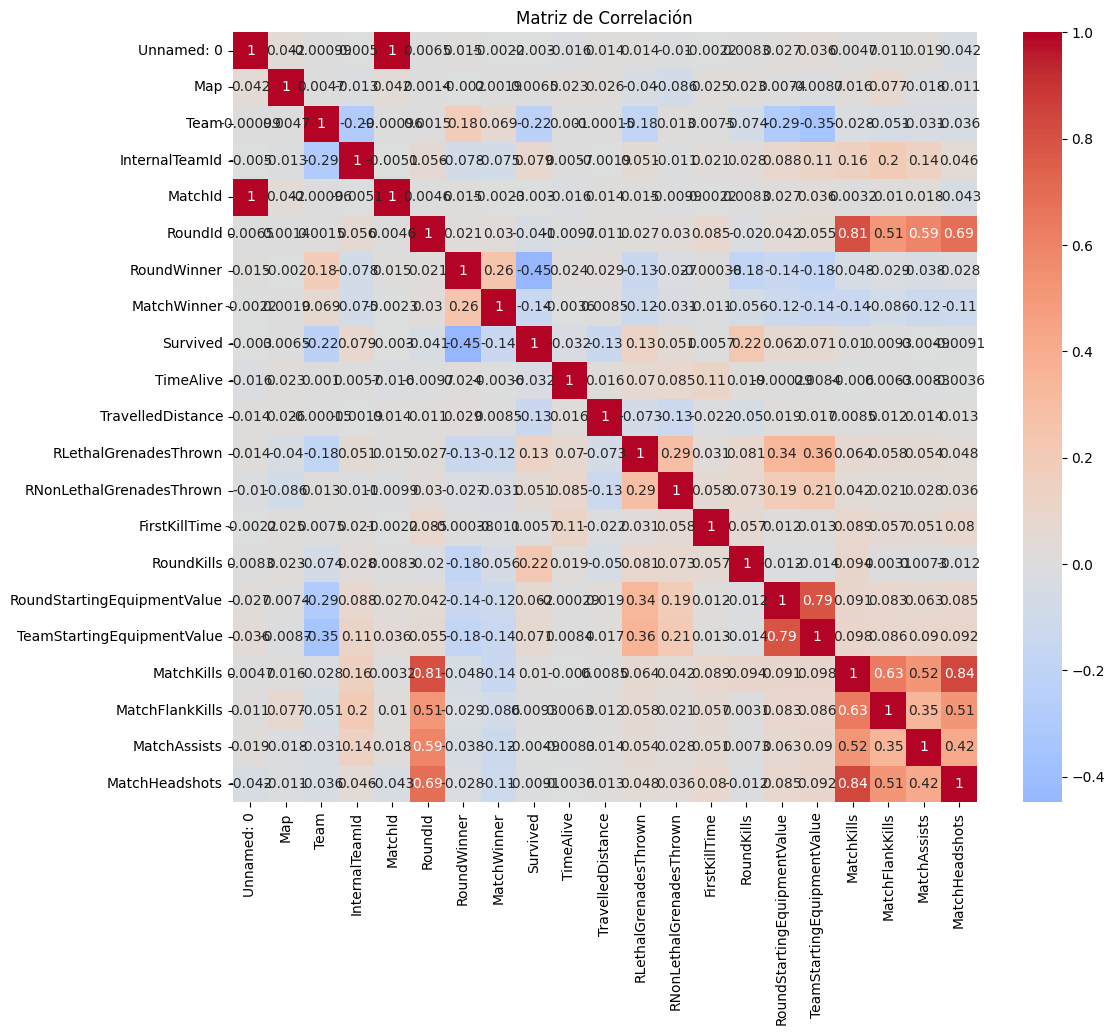

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_scaled_final.corr()

# Mostrar la matriz de correlación en formato tabular
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

Características seleccionadas: ['Team', 'RoundWinner', 'MatchWinner', 'TravelledDistance', 'RLethalGrenadesThrown', 'RoundKills']
Precisión del modelo mejorado: 0.71
Matriz de Confusión:
[[7832 1653]
 [3008 3339]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      9485
           1       0.67      0.53      0.59      6347

    accuracy                           0.71     15832
   macro avg       0.70      0.68      0.68     15832
weighted avg       0.70      0.71      0.70     15832



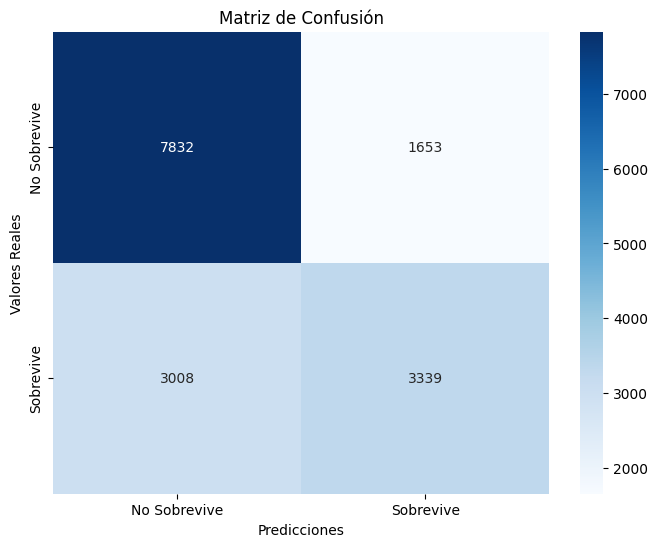

In [ ]:


# Asegurar que 'Survived' esté en el DataFrame
if 'Survived' not in df.columns:
    raise ValueError("La columna 'Survived' no se encuentra en el DataFrame. Verifica el nombre o agrega la columna.")

# Definir umbral de correlación y seleccionar características relevantes
threshold = 0.1
relevant_features = correlation_matrix.index[abs(correlation_matrix['Survived']) > threshold].tolist()
relevant_features.remove('Survived')

print("Características seleccionadas:", relevant_features)

# Crear DataFrame con las características seleccionadas
X = df[relevant_features]
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Definir parámetros para la búsqueda de cuadrícula (opcional)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Aplicar búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la búsqueda de cuadrícula
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del modelo mejorado: {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_logistic)
print("Reporte de Clasificación:")
print(class_report)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()




In [ ]:

# Crear DataFrame para evaluar la regresión logística
d = {"true": y_test, "predicted": y_pred, "accuracy": accuracy, }
df_logistic = pd.DataFrame(data=d)
df_logistic["diff"] = df_logistic["predicted"] - df_logistic["true"]


In [ ]:
print(df_logistic)

       true  predicted  accuracy  diff
11762     1          1  0.705596     0
31836     0          1  0.705596     1
3607      0          0  0.705596     0
65769     0          0  0.705596     0
2107      1          0  0.705596    -1
...     ...        ...       ...   ...
47710     0          0  0.705596     0
44092     0          0  0.705596     0
39572     0          0  0.705596     0
13904     1          0  0.705596    -1
13129     0          0  0.705596     0

[15832 rows x 4 columns]


**ARBOL DE DECISION**

### Clasificación



Precisión del modelo de árbol de decisión: 0.71
Matriz de Confusión:
[[6529 2956]
 [1648 4699]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      9485
           1       0.67      0.53      0.59      6347

    accuracy                           0.71     15832
   macro avg       0.70      0.68      0.68     15832
weighted avg       0.70      0.71      0.70     15832



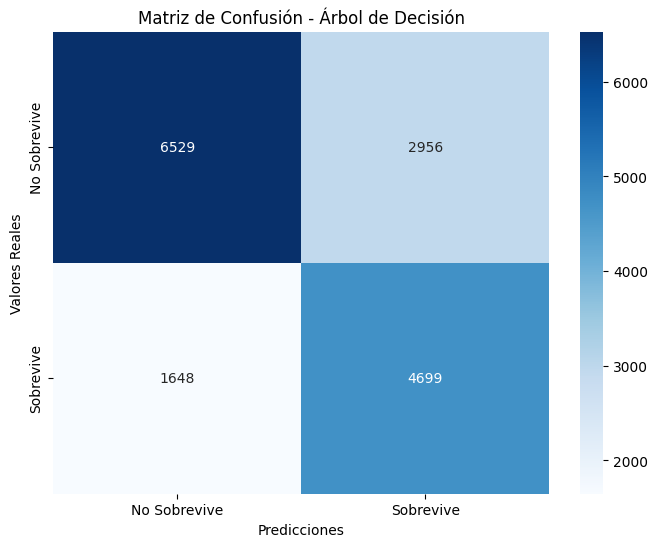

In [ ]:
# Usando todas las variables del DataFrame
X = df.drop(columns=['Survived'])  # Todas las columnas excepto 'Survived'
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)


# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Evaluación del modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred)


print(f"Precisión del modelo de árbol de decisión: {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Reporte de Clasificación:")
print(class_report)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

In [ ]:
# Crear DataFrame para evaluar el árbol de decisión
d_tree = {"true": y_test, "predicted": y_pred_tree, "accuracy": accuracy_tree}
df_tree = pd.DataFrame(data=d_tree)
df_tree["diff"] = df_tree["predicted"] - df_tree["true"]

# Muestra el DataFrame resultante para el árbol de decisión
print(df_tree.head())

       true  predicted  accuracy  diff
11762     1          1  0.709197     0
31836     0          1  0.709197     1
3607      0          0  0.709197     0
65769     0          0  0.709197     0
2107      1          1  0.709197     0


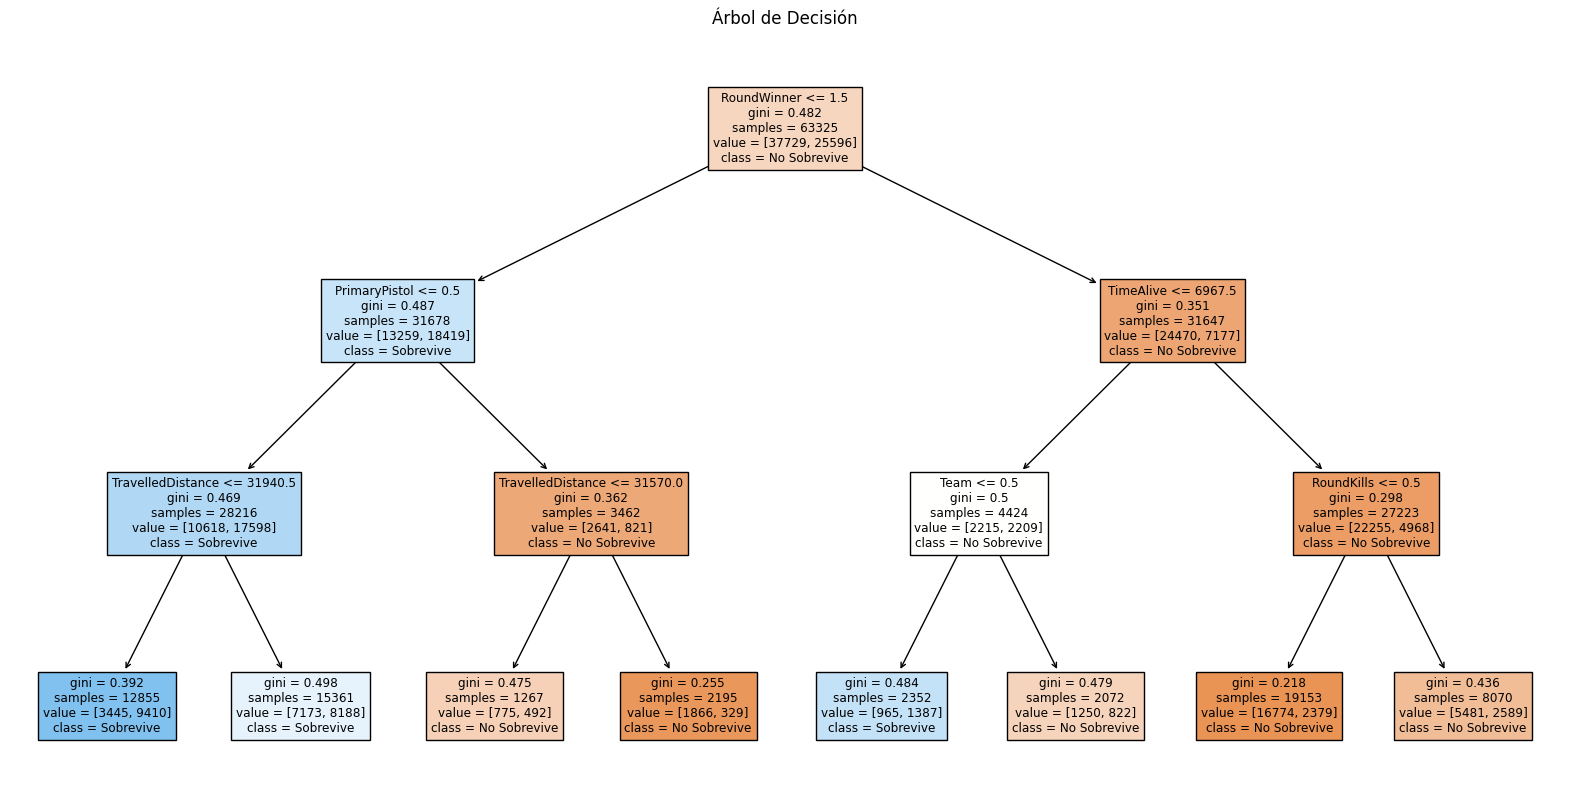

In [ ]:

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['No Sobrevive', 'Sobrevive'])
plt.title('Árbol de Decisión')
plt.show()

# SVC

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# 1. Selección de características relevantes usando la matriz de correlación
threshold = 0.1
correlation_matrix = df.corr()
relevant_features = correlation_matrix.index[abs(correlation_matrix['Survived']) > threshold].tolist()
relevant_features.remove('Survived')

print("Características seleccionadas para SVC:", relevant_features)

# 2. Crear DataFrame con las características seleccionadas
X = df[relevant_features]
y = df['Survived']

# 3. Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Crear modelo de SVC con parámetros ajustados
svc_model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

# 6. Entrenar y evaluar el modelo
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# 7. Evaluación del modelo
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)

print(f"Precisión del modelo SVC optimizado: {accuracy_svc:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_svc)
print("Reporte de Clasificación:")
print(class_report_svc)

Características seleccionadas para SVC: ['Team', 'RoundWinner', 'MatchWinner', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimaryPistol', 'RoundKills', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']
Precisión del modelo SVC optimizado: 0.67
Matriz de Confusión:
[[6109 3376]
 [1812 4535]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      9485
           1       0.57      0.71      0.64      6347

    accuracy                           0.67     15832
   macro avg       0.67      0.68      0.67     15832
weighted avg       0.69      0.67      0.68     15832



In [ ]:
# Crear DataFrame para evaluar el SVC
d_svc = {"true": y_test, "predicted": y_pred_svc, "accuracy": [accuracy_svc] * len(y_test)}
df_svc = pd.DataFrame(data=d_svc)
df_svc["diff"] = df_svc["predicted"] - df_svc["true"]

In [ ]:
# Muestra el DataFrame resultante para el SVC
print(df_svc.head())

       true  predicted  accuracy  diff
11762     1          1  0.672309     0
31836     0          1  0.672309     1
3607      0          0  0.672309     0
65769     0          0  0.672309     0
2107      1          0  0.672309    -1


# RandomForest

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda para RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200],       # Número de árboles
    'max_depth': [10, 20, 30],              # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],        # Mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4]           # Mínimo de muestras en las hojas
}

# Crear modelo de RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Aplicar búsqueda aleatoria de cuadrícula con validación cruzada
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
random_search_rf.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la búsqueda aleatoria de cuadrícula
best_rf_model = random_search_rf.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test)

# Evaluación del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Precisión del modelo RandomForest optimizado: {accuracy_rf:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Precisión del modelo RandomForest optimizado: 0.74


Precisión del modelo RandomForest: 0.74
Matriz de Confusión:
[[7465 2020]
 [2030 4317]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      9485
           1       0.68      0.68      0.68      6347

    accuracy                           0.74     15832
   macro avg       0.73      0.73      0.73     15832
weighted avg       0.74      0.74      0.74     15832



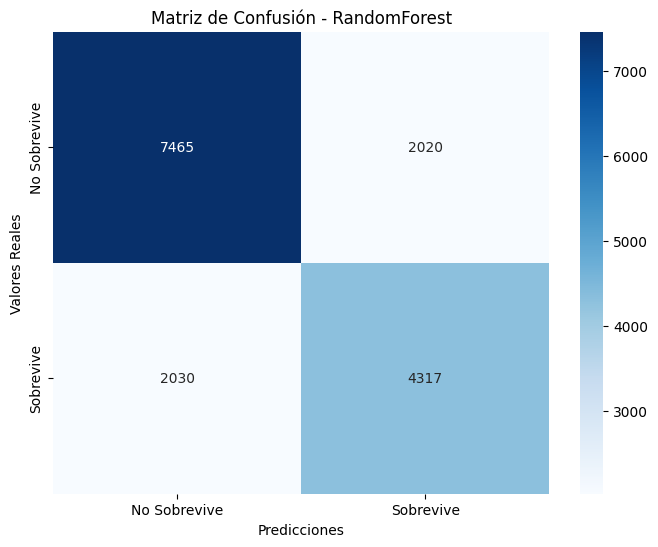

In [ ]:
# Evaluación del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Precisión del modelo RandomForest: {accuracy_rf:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_rf)
print("Reporte de Clasificación:")
print(class_report_rf)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - RandomForest')
plt.show()

In [ ]:
# Crear DataFrame para evaluar el modelo RandomForest
d_rf = {"true": y_test, "predicted": y_pred_rf, "accuracy": [accuracy_rf] * len(y_test)}
df_rf = pd.DataFrame(data=d_rf)
df_rf["diff"] = df_rf["predicted"] - df_rf["true"]

# Muestra el DataFrame resultante para RandomForest
print(df_rf.head())


       true  predicted  accuracy  diff
11762     1          1  0.744189     0
31836     0          0  0.744189     0
3607      0          0  0.744189     0
65769     0          0  0.744189     0
2107      1          0  0.744189    -1


## Fase 5: Evaluation

In [ ]:
# Agregar columna de modelo a cada DataFrame
df_logistic['Modelo'] = 'Regresión Logística'
df_tree['Modelo'] = 'Árbol de Decisión'
df_rf['Modelo'] = 'Random Forest'
df_svc['Modelo'] = 'SVC'

# Concatenar todos los DataFrames en uno solo
df_resultados = pd.concat([df_logistic, df_tree, df_rf, df_svc], ignore_index=True)

# Mostrar el DataFrame consolidado
print("DataFrame consolidado de resultados:")
print(df_resultados)



DataFrame consolidado de resultados:
       true  predicted  accuracy  diff               Modelo
0         1          1  0.705596     0  Regresión Logística
1         0          1  0.705596     1  Regresión Logística
2         0          0  0.705596     0  Regresión Logística
3         0          0  0.705596     0  Regresión Logística
4         1          0  0.705596    -1  Regresión Logística
...     ...        ...       ...   ...                  ...
63323     0          0  0.672309     0                  SVC
63324     0          1  0.672309     1                  SVC
63325     0          0  0.672309     0                  SVC
63326     1          0  0.672309    -1                  SVC
63327     0          0  0.672309     0                  SVC

[63328 rows x 5 columns]


In [ ]:
df_filtrado = df_resultados.groupby('Modelo').head(1)

In [ ]:
# Mostrar el DataFrame filtrado
print("DataFrame filtrado de resultados:")
print(df_filtrado)

DataFrame filtrado de resultados:
       true  predicted  accuracy  diff               Modelo
0         1          1  0.705596     0  Regresión Logística
15832     1          1  0.709197     0    Árbol de Decisión
31664     1          1  0.744189     0        Random Forest
47496     1          1  0.672309     0                  SVC


In [ ]:
# Mostrar el DataFrame consolidado con los accuracies
print("DataFrame consolidado de resultados con Accuracy:")
print(df_filtrado[['Modelo', 'accuracy']])

DataFrame consolidado de resultados con Accuracy:
                    Modelo  accuracy
0      Regresión Logística  0.705596
15832    Árbol de Decisión  0.709197
31664        Random Forest  0.744189
47496                  SVC  0.672309


<ipython-input-75-8c774367c53a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Modelo', y='accuracy', data=df_resultados, palette='viridis')


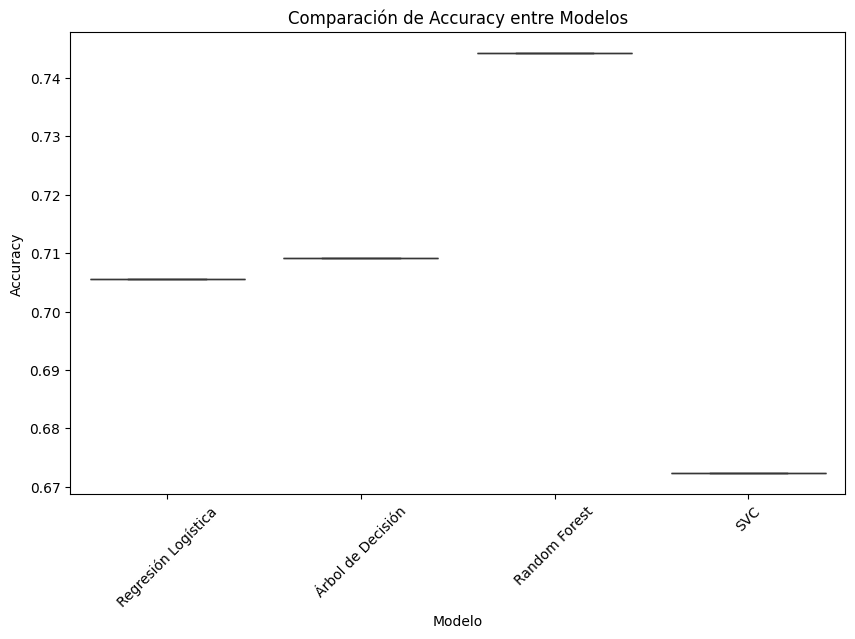

In [ ]:
# Comparación visual usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='accuracy', data=df_resultados, palette='viridis')
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE para cada modelo
df_logistic['MAE'] = mean_absolute_error(df_logistic['true'], df_logistic['predicted'])
df_tree['MAE'] = mean_absolute_error(df_tree['true'], df_tree['predicted'])
df_rf['MAE'] = mean_absolute_error(df_rf['true'], df_rf['predicted'])
df_svc['MAE'] = mean_absolute_error(df_svc['true'], df_svc['predicted'])

# Agregar columna de modelo a cada DataFrame
df_logistic['Modelo'] = 'Regresión Logística'
df_tree['Modelo'] = 'Árbol de Decisión'
df_rf['Modelo'] = 'Random Forest'
df_svc['Modelo'] = 'SVC'

# Concatenar todos los DataFrames en uno solo
df_resultados1 = pd.concat([df_logistic, df_tree, df_rf, df_svc], ignore_index=True)



In [ ]:
# Calcular MAE para cada modelo
mae_logistic = mean_absolute_error(df_logistic['true'], df_logistic['predicted'])
mae_tree = mean_absolute_error(df_tree['true'], df_tree['predicted'])
mae_rf = mean_absolute_error(df_rf['true'], df_rf['predicted'])
mae_svc = mean_absolute_error(df_svc['true'], df_svc['predicted'])

# Imprimir los resultados
print('Distancia promedio entre los datos reales y los datos pronosticados')
print(f"MAE de Regresión Logística: {mae_logistic:.2f}")
print(f"MAE de Árbol de Decisión: {mae_tree:.2f}")
print(f"MAE de Random Forest: {mae_rf:.2f}")
print(f"MAE de SVC: {mae_svc:.2f}")

Distancia promedio entre los datos reales y los datos pronosticados
MAE de Regresión Logística: 0.29
MAE de Árbol de Decisión: 0.29
MAE de Random Forest: 0.26
MAE de SVC: 0.33


In [ ]:
# Datos de ejemplo (sustituir con tus valores reales)
modelos = ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'SVC']
mae_values = [mae_logistic, mae_tree, mae_rf, mae_svc]

<ipython-input-79-3cb2243ee913>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=mae_values, palette='viridis')


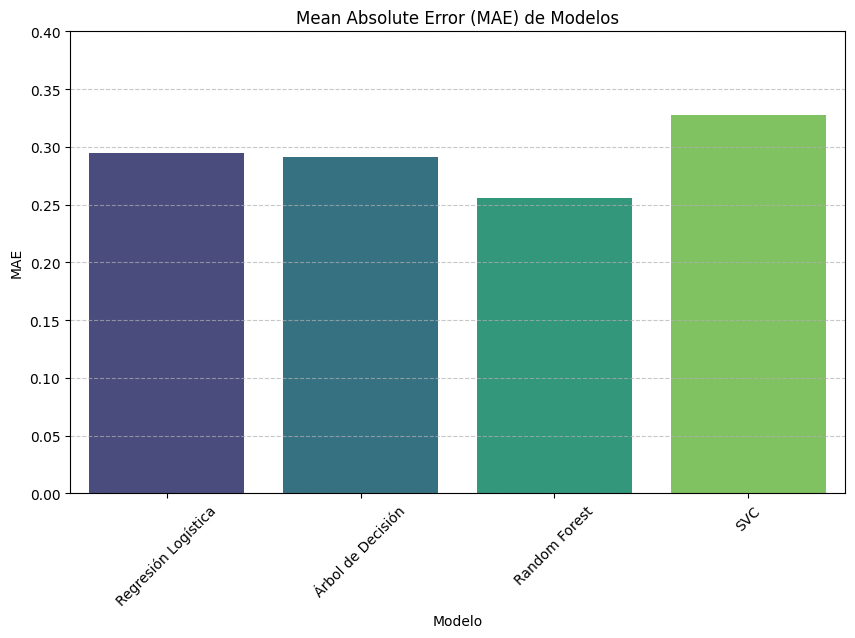

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=modelos, y=mae_values, palette='viridis')
plt.title('Mean Absolute Error (MAE) de Modelos')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.ylim(0, 0.4)  # Ajustar límites y según tus datos
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_log_error

# Supongamos que ya tienes y_test y y_pred para cada modelo
# Calculando MSLE para cada modelo
msle_logistic = mean_squared_log_error(df_logistic['true'], df_logistic['predicted'])
msle_tree = mean_squared_log_error(df_tree['true'], df_tree['predicted'])
msle_rf = mean_squared_log_error(df_rf['true'], df_rf['predicted'])
msle_svc = mean_squared_log_error(df_svc['true'], df_svc['predicted'])

# Imprimiendo los resultados en formato porcentaje
print("Error Logarítmico Cuadrático Medio Logística: {:.2%}".format(msle_logistic))
print("Error Logarítmico Cuadrático Medio Árbol de Decisión: {:.2%}".format(msle_tree))
print("Error Logarítmico Cuadrático Medio Random Forest: {:.2%}".format(msle_rf))
print("MError Logarítmico Cuadrático Medio SVC: {:.2%}".format(msle_svc))

Error Logarítmico Cuadrático Medio Logística: 14.14%
Error Logarítmico Cuadrático Medio Árbol de Decisión: 13.97%
Error Logarítmico Cuadrático Medio Random Forest: 12.29%
MError Logarítmico Cuadrático Medio SVC: 15.74%


<ipython-input-81-16eaa4a5f347>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=msle_scores, palette='viridis')


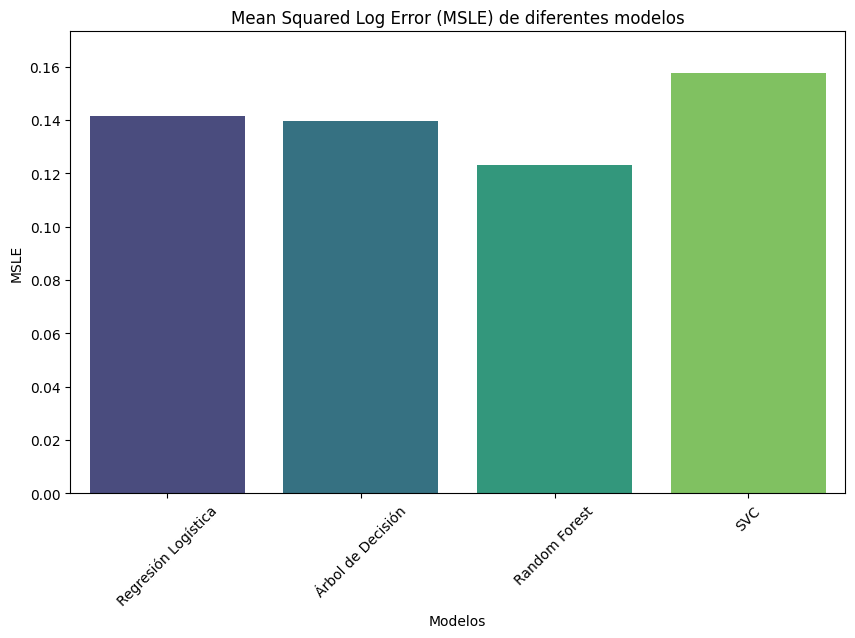

In [ ]:
# Suponiendo que tienes los valores de MSLE para cada modelo
msle_values = {
    'Regresión Logística': msle_logistic,
    'Árbol de Decisión': msle_tree,
    'Random Forest': msle_rf,
    'SVC': msle_svc
}

# Convertir el diccionario a listas para graficar
models = list(msle_values.keys())
msle_scores = list(msle_values.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=msle_scores, palette='viridis')
plt.title('Mean Squared Log Error (MSLE) de diferentes modelos')
plt.xlabel('Modelos')
plt.ylabel('MSLE')
plt.xticks(rotation=45)
plt.ylim(0, max(msle_scores) * 1.1)  # Ajustar el rango del eje y para mejor visualización
plt.show()

Basado en estas métricas, Random Forest muestra un desempeño superior en términos de precisión (Accuracy), menor Error Absoluto Medio (MAE) y menor Error Logarítmico Cuadrático Medio (MSLE) en comparación con los otros modelos evaluados. El modelo de Random Forest podría ser la mejor opción entre los cuatro modelos comparados.








In [ ]:
model = best_rf_model
model


RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [ ]:
# Imprimir el modelo asignado
print(model)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)


## Fase 5: Deployment

# Entonces, nuestro modelo Random Forest es un modelo bastante bueno para predecir

In [ ]:
new_data_juegofacil = {
    'Team': [1],
    'RoundWinner': [0],
    'MatchWinner': [0],
    'TravelledDistance': [0],
    'RLethalGrenadesThrown': [0],
    'RNonLethalGrenadesThrown': [1],
    'PrimaryAssaultRifle': [0],
    'PrimaryPistol': [0],
    'RoundKills': [5],
    'RoundHeadshots': [0],
    'RoundFlankKills': [0],
    'RoundStartingEquipmentValue': [0],
    'TeamStartingEquipmentValue': [0]
}

# Crear DataFrame con los datos nuevos
df_new = pd.DataFrame(new_data_juegofacil)


In [ ]:
new_data_juego_dificil = [[1, 5, 7, 3, 14, 56, 2, 0, 8, 7,20, 45, 14]]
df_new = pd.DataFrame(new_data_juego_dificil)

In [ ]:


# Realizar predicciones con el modelo
predictions = model.predict(df_new)

# Imprimir las predicciones con su interpretación
print("Predicciones con RandomForestClassifier:")
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"El jugador en este contexto N°{i+1} logró: Sobrevivir")
    else:
        print(f"El jugador en este contexto N°{i+1} no logró sobrevivir")



Predicciones con RandomForestClassifier:
El jugador en este contexto N°1 logró: Sobrevivir


In [ ]:
import pickle

In [ ]:
# Primero, abramos un nuevo archivo para nuestro almacenar nuestro modelo y poder llamarlo
f1 = open('fw_model1', 'wb')

In [ ]:
# Así, salvamos en este archivo nuestro modelo de Bosque Aleatorio
pickle.dump(model , f1)

In [ ]:
# Y cerramos el archivo
f1.close()

# Tendremos un nuevo Notebook

In [ ]:
# Cargar el modelo desde el archivo
with open('fw_model1', 'rb') as f:
    model = pickle.load(f)

# Ejemplo de nuevos datos para predecir
new_data_juego_dificil = [[1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0]]
df_new = pd.DataFrame(new_data_juego_dificil)

# Realizar la predicción utilizando el modelo cargado
predictions = model.predict(df_new)

print(f"La predicción es: {prediction}")

# Imprimir las predicciones con su interpretación
print("Predicciones con RandomForestClassifier:")
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"El jugador en este contexto N°{i+1} logró: Sobrevive")
    else:
        print(f"El jugador en este contexto N°{i+1} no logró sobrevivir")

La predicción es: 0
Predicciones con RandomForestClassifier:
El jugador en este contexto N°1 no logró sobrevivir


# Profesor un 7 para este pobre indigente
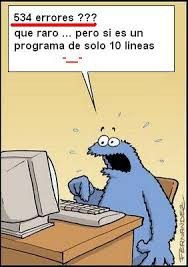